In [1]:
# Importing necessary libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [3]:
from tkinter import filedialog
from tkinter import Tk

# Open a file dialog to upload the file
root = Tk()
root.withdraw()  # Don't need the root window
file_path = filedialog.askopenfilename(title="Select the file", filetypes=[("Excel files", "*.xlsx")])

# Load the file
import pandas as pd
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())


   Id          Start time     Completion time      Email  Name  \
0   1 2023-10-09 11:22:45 2023-10-09 11:23:50  anonymous   NaN   
1   2 2023-10-09 11:35:53 2023-10-09 11:37:12  anonymous   NaN   
2   3 2023-10-09 11:41:50 2023-10-09 11:43:54  anonymous   NaN   
3   4 2023-10-09 11:43:11 2023-10-09 11:44:15  anonymous   NaN   
4   5 2023-10-09 11:43:20 2023-10-09 11:44:40  anonymous   NaN   

            Full Name                     SMU Email Address  \
0           Derick Du            Xun.du.2023@mpa.smu.edu.sg   
1                 Som       Sompassornr.2022@pbs.smu.edu.sg   
2        Samantha lim     Yanfang.lim.2023@socsc.smu.edu.sg   
3  Lim Li Yi, Clarine  clarine.lim.2022@business.smu.edu.sg   
4    Hu YiXuan, Elise     elise.hu.2022@business.smu.edu.sg   

  Name It to Tame It.I found the activity engaging  \
0                                   Strongly agree   
1                                   Strongly agree   
2                                            Agree   
3       

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:", missing_values)

# Remove rows with missing values (optional, based on context)
data_cleaned = data.dropna(subset=['Please share with us key takeaways from Mental Health Week 2023'])

# Remove duplicates if any
data_cleaned = data_cleaned.drop_duplicates()

# Display cleaned data
print(data_cleaned.head())


Missing Values: Id                                                                                  0
Start time                                                                          0
Completion time                                                                     0
Email                                                                               0
Name                                                                              323
Full Name                                                                           0
SMU Email Address                                                                   0
Name It to Tame It.I found the activity engaging                                    9
Name It to Tame It.I can apply the learning gleaned from this activity             11
Name It to Tame It.I will recommend this activity to others                        16
My MHW2023 Resolution.I found the activity engaging                                 9
My MHW2023 Resolution.I can apply the 

In [5]:
# Group by the engagement response columns and get the count of each response
engagement_summary = data_cleaned.groupby('Name It to Tame It.I found the activity engaging').size().reset_index(name='Count')
apply_learning_summary = data_cleaned.groupby('Name It to Tame It.I can apply the learning gleaned from this activity').size().reset_index(name='Count')
recommend_activity_summary = data_cleaned.groupby('Name It to Tame It.I will recommend this activity to others').size().reset_index(name='Count')

# Display results
print(engagement_summary)
print(apply_learning_summary)
print(recommend_activity_summary)


  Name It to Tame It.I found the activity engaging  Count
0                                            Agree    126
1                                         Disagree      1
2                                   Strongly agree    187
  Name It to Tame It.I can apply the learning gleaned from this activity  \
0                                              Agree                       
1                                           Disagree                       
2                                     Strongly agree                       

   Count  
0    125  
1      1  
2    186  
  Name It to Tame It.I will recommend this activity to others  Count
0                                              Agree             116
1                                           Disagree               1
2                                     Strongly agree             190


Activity Engagement Analysis:

Engagement Levels:

"I found the activity engaging":

The majority of students responded with "Strongly agree" (187) and "Agree" (126), showing that most participants found the activities engaging.

There was only 1 "Disagree" response, which suggests that engagement with the activities was generally high.

"I can apply the learning gleaned from this activity":

Similar to engagement, 186 responses were "Strongly agree," and 125 responses were "Agree." This suggests that students found the learning outcomes valuable and feel they can apply them.

"I will recommend this activity to others":

190 students strongly agree and 116 agree, further supporting the conclusion that the initiative was positively received, with many willing to recommend it.

Insight: Overall, the activities were well-received, and students are likely to recommend them to others. The high levels of engagement and applicability suggest that the Mental Health Week initiatives were successful in delivering value.

In [6]:
from textblob import TextBlob

# Function to calculate sentiment
def analyze_sentiment(text):
    if pd.isna(text):  # Skip NaN responses
        return 'Neutral'
    blob = TextBlob(str(text))
    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to 'key takeaways' and 'improvement suggestions'
data_cleaned['Takeaways Sentiment'] = data_cleaned['Please share with us key takeaways from Mental Health Week 2023'].apply(analyze_sentiment)
data_cleaned['Improvements Sentiment'] = data_cleaned['Please let us know how we can improve Mental Health Week for the SMU community'].apply(analyze_sentiment)

# Display sentiment analysis results
print(data_cleaned[['Please share with us key takeaways from Mental Health Week 2023', 'Takeaways Sentiment']].head())
print(data_cleaned[['Please let us know how we can improve Mental Health Week for the SMU community', 'Improvements Sentiment']].head())


  Please share with us key takeaways from Mental Health Week 2023  \
0                          Mental health is critical                
1                       Be patient success will come                
2                  Learning about the reframe method                
3                 take a breath and focus on myself                 
4  I learnt how to regulate my emotions when i’m ...                

  Takeaways Sentiment  
0            Negative  
1            Positive  
2             Neutral  
3             Neutral  
4             Neutral  
  Please let us know how we can improve Mental Health Week for the SMU community  \
0                                                NaN                               
1     Less time for each booth....need to read a lot                               
2              Shorten the timing for the activities                               
3                                    more publicity                                
4                    

The "key takeaways" column has a mix of sentiments:

Positive: There were responses such as "Mental health is critical" and "Be patient, success will come," indicating a constructive and reflective mindset among students.

Neutral: Many responses fell under neutral sentiments, such as "I learnt how to regulate my emotions" or "Learning about the reframe method." This could indicate a neutral but helpful impact of the activities.

Negative: There were also a few responses with a negative sentiment, such as "Mental health is critical," which may imply that the students found the awareness of mental health issues unsettling or overwhelming.

Insight: The sentiment analysis indicates that the majority of students found value in the activities, though some may have found certain aspects of the event confronting or heavy.

In [7]:
# Frequency of key takeaways
key_takeaways_frequency = data_cleaned['Please share with us key takeaways from Mental Health Week 2023'].value_counts().head(10)
print("Top 10 Key Takeaways:")
print(key_takeaways_frequency)

# Frequency of improvement suggestions
improvement_suggestions_frequency = data_cleaned['Please let us know how we can improve Mental Health Week for the SMU community'].value_counts().head(10)
print("Top 10 Improvement Suggestions:")
print(improvement_suggestions_frequency)


Top 10 Key Takeaways:
Please share with us key takeaways from Mental Health Week 2023
Nil                                                                                                                                6
-                                                                                                                                  3
be happy                                                                                                                           2
I learnt more about myself                                                                                                         2
I really needed to slow down and take my time to enjoy the activities, it was a nice reminder to take it slow in midterms week     1
mental health is important                                                                                                         1
Be kind to yourself                                                                                                 

The top key takeaways are generally positive, but also show some areas for deeper reflection:

The most common key takeaway was "Mental health is critical" (6 responses), underscoring the importance of addressing mental health awareness.

Other key takeaways include "I learnt more about myself" and "Be happy" — suggesting that the event helped students reflect on personal well-being and mental health.

Some takeaways like "Failure is ok! take things step by step" show a healthy mindset shift, indicating that the activities may have been effective in reducing stress and promoting resilience.

Insight: The key takeaways suggest that the Mental Health Week was impactful in helping students become more self-aware and accept challenges. Future events can highlight emotional self-regulation and stress management more explicitly.

Group Analysis based on demographics 

In [8]:
# Extract domain from the email to group by faculty (assuming email is structured as 'name@faculty.smu.edu.sg')
data_cleaned['Faculty'] = data_cleaned['SMU Email Address'].str.split('@').str[1].str.split('.').str[0]

# Now, let's group by faculty and analyze engagement (using "I found the activity engaging")
faculty_engagement = data_cleaned.groupby('Faculty')['Name It to Tame It.I found the activity engaging'].value_counts().unstack(fill_value=0)

# Display the engagement per faculty
print(faculty_engagement)


Name It to Tame It.I found the activity engaging  Agree  Disagree  \
Faculty                                                             
126                                                   1         0   
accountancy                                           8         0   
bus                                                   0         0   
business                                             14         1   
cis                                                   0         0   
economics                                             8         0   
exchange                                              3         0   
exhange                                               1         0   
gmail                                                 1         0   
law                                                   6         0   
maf                                                   0         0   
mba                                                   0         0   
mitb                              

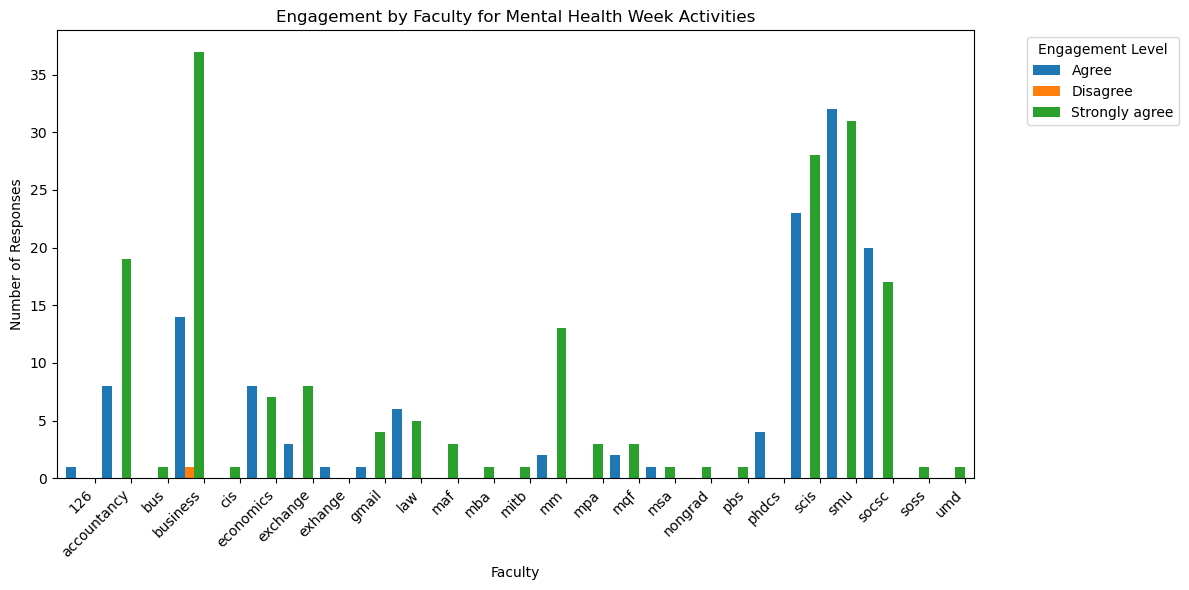

In [10]:
import matplotlib.pyplot as plt

# Plot engagement per faculty using side-by-side bars
faculty_engagement.plot(kind='bar', figsize=(12, 6), width=0.8, position=1)
plt.title('Engagement by Faculty for Mental Health Week Activities')
plt.xlabel('Faculty')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title='Engagement Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

